Variation in the code: Comparing the Learning rates on the same model.

In [139]:
# Code by Bhavy Kharbanda
# Sap Id: 500082531

In [140]:
# Importing the libraries
import torch
import sklearn
import torch.nn as nn
import torch.nn.functional as F


In [141]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# make_classification to generate a random classification dataset
# train_test split to split the data in training and testing
# StandardScaler to Standardize features by removing the mean and scaling to unit variance.


In [142]:
# Creating The dataset
X, y = make_classification(n_samples=2000, n_classes=2, n_features=5)

# Normalizing the Dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Converting Array to Tensor objects
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [143]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.3, random_state=21)
print("Size of training dataset: ")
print(X_train.shape)
print("Size of testing dataset: ")
print(X_test.shape)
# Direct function in sklearn to split the dataset


Size of training dataset: 
torch.Size([1400, 5])
Size of testing dataset: 
torch.Size([600, 5])


In [144]:
class NNpt(nn.Module):
    def __init__(self, n_features):
        super(NNpt, self).__init__()
        self.linear = nn.Linear(n_features, 1)

        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()

    def forward(self, x):
        out = self.linear(x)
        return out.view(-1)


def loss_fn(yhat, y):
    return torch.mean((yhat-y)**2)


In [145]:
# For Model: 1
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):

    cost = []
    torch.manual_seed(seed)
    # To optimize our algorithm
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        suffle_idx = torch.randperm(y.size(0))
        batches = torch.split(suffle_idx, bsz)

        for idx in batches:
            # 1. Compute the Output
            yhat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.mse_loss(yhat, y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = loss_fn(yhat, y)
            print('Epoc: %3d ' % (i+1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [146]:
n_feature = X_train.size(1)
model = NNpt(n_features=n_feature)
# Calling the model
cost = train(model, X_train, y_train, n_epoch=50)


Epoc:   1 | MSE  0.44780
Epoc:   2 | MSE  0.40321
Epoc:   3 | MSE  0.36546
Epoc:   4 | MSE  0.33336
Epoc:   5 | MSE  0.30601
Epoc:   6 | MSE  0.28258
Epoc:   7 | MSE  0.26247
Epoc:   8 | MSE  0.24517
Epoc:   9 | MSE  0.23022
Epoc:  10 | MSE  0.21728
Epoc:  11 | MSE  0.20601
Epoc:  12 | MSE  0.19622
Epoc:  13 | MSE  0.18768
Epoc:  14 | MSE  0.18020
Epoc:  15 | MSE  0.17364
Epoc:  16 | MSE  0.16788
Epoc:  17 | MSE  0.16282
Epoc:  18 | MSE  0.15836
Epoc:  19 | MSE  0.15442
Epoc:  20 | MSE  0.15094
Epoc:  21 | MSE  0.14786
Epoc:  22 | MSE  0.14513
Epoc:  23 | MSE  0.14272
Epoc:  24 | MSE  0.14057
Epoc:  25 | MSE  0.13867
Epoc:  26 | MSE  0.13698
Epoc:  27 | MSE  0.13548
Epoc:  28 | MSE  0.13414
Epoc:  29 | MSE  0.13295
Epoc:  30 | MSE  0.13189
Epoc:  31 | MSE  0.13094
Epoc:  32 | MSE  0.13010
Epoc:  33 | MSE  0.12935
Epoc:  34 | MSE  0.12867
Epoc:  35 | MSE  0.12808
Epoc:  36 | MSE  0.12754
Epoc:  37 | MSE  0.12707
Epoc:  38 | MSE  0.12664
Epoc:  39 | MSE  0.12626
Epoc:  40 | MSE  0.12592


[]

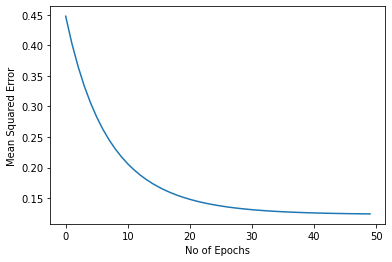

In [147]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()


In [148]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print("Accuracy for Model: 1")
print('Training Accuracy: %.2f' % (train_acc*100),'%')
print('Testing Accuracy: %.2f' % (test_acc*100),'%')

Accuracy for Model: 1
Training Accuracy: 85.79 %
Testing Accuracy: 85.17 %


In [149]:
# For Model: 1
def train(model, x, y, n_epoch=10, lr=0.1, seed=23, bsz=50):

    cost = []
    torch.manual_seed(seed)
    # To optimize our algorithm
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        suffle_idx = torch.randperm(y.size(0))
        batches = torch.split(suffle_idx, bsz)

        for idx in batches:
            # 1. Compute the Output
            yhat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.mse_loss(yhat, y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yhat = model.forward(x)
            curr_loss = loss_fn(yhat, y)
            print('Epoc: %3d ' % (i+1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [150]:
n_feature = X_train.size(1)
model = NNpt(n_features=n_feature)
# Calling the model
cost = train(model, X_train, y_train, n_epoch=50)


Epoc:   1 | MSE  0.12633
Epoc:   2 | MSE  0.12411
Epoc:   3 | MSE  0.12363
Epoc:   4 | MSE  0.12453
Epoc:   5 | MSE  0.12650
Epoc:   6 | MSE  0.12326
Epoc:   7 | MSE  0.12707
Epoc:   8 | MSE  0.12663
Epoc:   9 | MSE  0.12428
Epoc:  10 | MSE  0.12439
Epoc:  11 | MSE  0.12487
Epoc:  12 | MSE  0.12366
Epoc:  13 | MSE  0.12451
Epoc:  14 | MSE  0.12443
Epoc:  15 | MSE  0.12449
Epoc:  16 | MSE  0.12391
Epoc:  17 | MSE  0.12328
Epoc:  18 | MSE  0.12339
Epoc:  19 | MSE  0.12531
Epoc:  20 | MSE  0.12469
Epoc:  21 | MSE  0.12815
Epoc:  22 | MSE  0.12403
Epoc:  23 | MSE  0.12605
Epoc:  24 | MSE  0.12495
Epoc:  25 | MSE  0.12337
Epoc:  26 | MSE  0.12383
Epoc:  27 | MSE  0.12418
Epoc:  28 | MSE  0.12717
Epoc:  29 | MSE  0.12561
Epoc:  30 | MSE  0.12387
Epoc:  31 | MSE  0.12625
Epoc:  32 | MSE  0.12389
Epoc:  33 | MSE  0.12408
Epoc:  34 | MSE  0.12392
Epoc:  35 | MSE  0.12520
Epoc:  36 | MSE  0.12358
Epoc:  37 | MSE  0.12418
Epoc:  38 | MSE  0.12467
Epoc:  39 | MSE  0.12409
Epoc:  40 | MSE  0.12358


[]

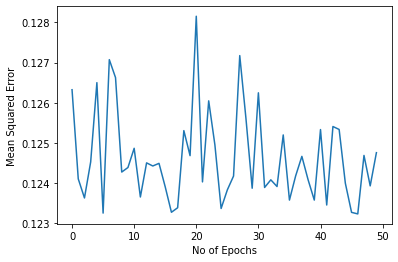

In [151]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()


In [152]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print("Accuracy for Model: 2")
print('Training Accuracy: %.2f' % (train_acc*100),'%')
print('Testing Accuracy: %.2f' % (test_acc*100),'%')

Accuracy for Model: 2
Training Accuracy: 86.71 %
Testing Accuracy: 85.50 %
